In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
buildings = gpd.read_parquet('/data/uscuni-ulce/germany_ages/buildings_age.parquet')
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296


In [16]:
bins = list(range(1850, 2040, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]

In [17]:
buildings["year_bin"] = pd.cut(buildings["year"], bins=bins, labels=bin_labels, right=True)
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id,year_bin
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813,1960–1969
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835,1960–1969
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822,1940–1949
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966,1970–1979
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934,1950–1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607,1950–1959
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608,1950–1959
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295,1970–1979
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296,1970–1979


In [36]:
def stacked_cumulative_types(lvl):
    # Count buildings by year and type level
    yearly_counts = (
        buildings
        .groupby(["year", f"level_{lvl}_label"])
        .size()
        .reset_index(name="count")
    )

    # Pivot to have each type as a column
    pivot_df = yearly_counts.pivot(index="year", columns=f"level_{lvl}_label", values="count").fillna(0)

    # Sort by year and compute cumulative sum
    pivot_cum = pivot_df.sort_index().cumsum()

    # Stacked area plot
    pivot_cum.plot(kind="area", stacked=True, figsize=(12,6), alpha=0.8, colormap="tab20")

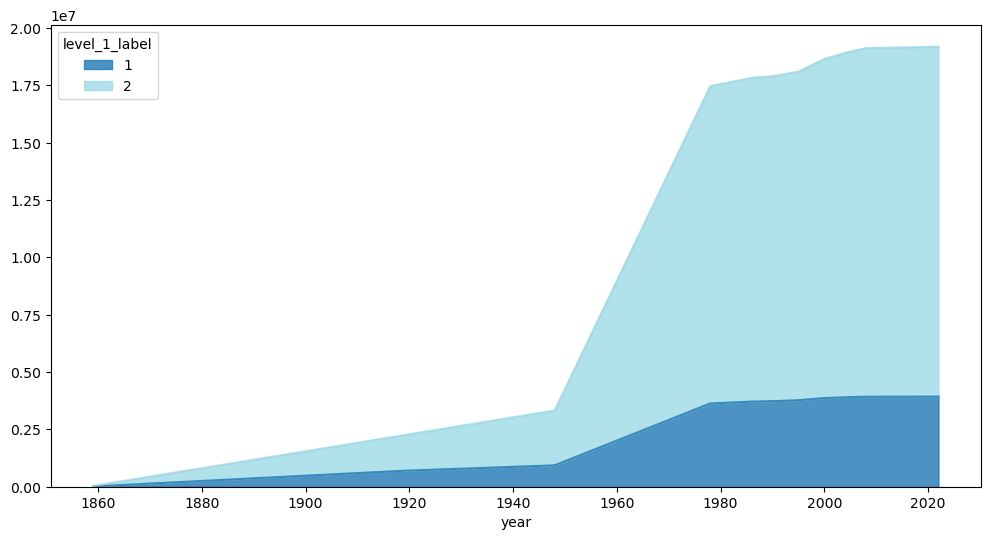

In [37]:
stacked_cumulative_types(1)

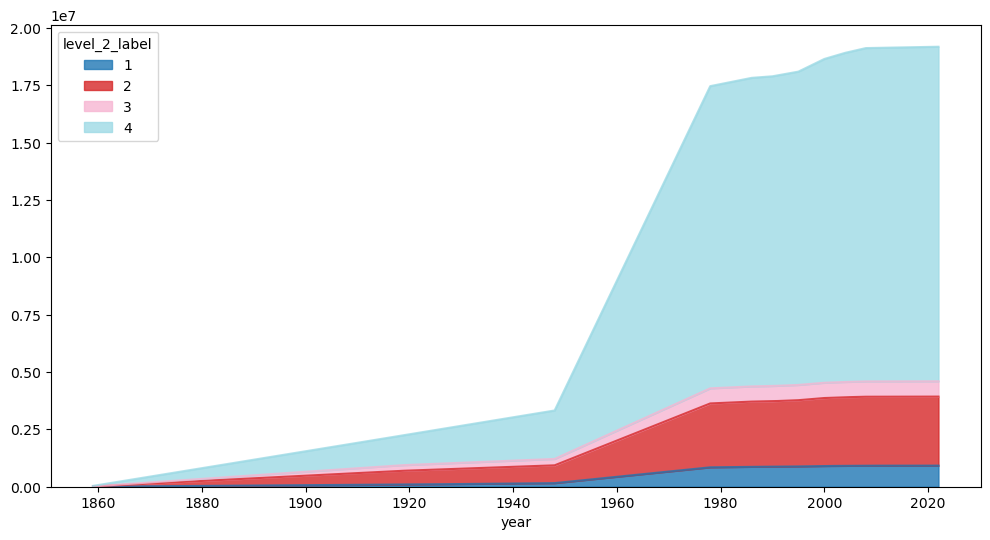

In [39]:
stacked_cumulative_types(2)

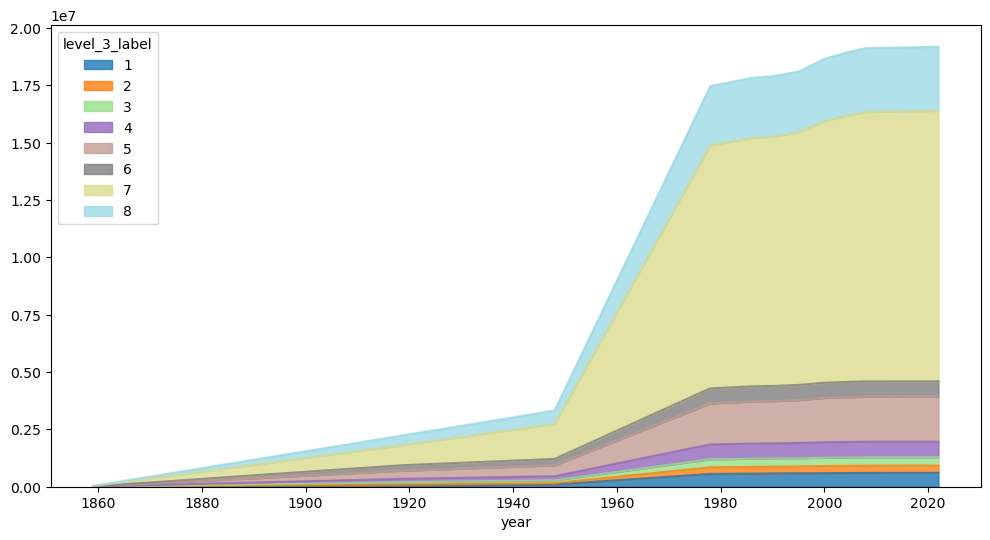

In [40]:
stacked_cumulative_types(3)

In [25]:
# Example: list of Eastern NUTS1 codes
eastern_nuts1 = {"3", "4", "8", "D", "E", "G"}

# Extract the first 3 characters from 'id' and map to Eastern/Western
buildings["east_west"] = buildings["id"].str[2].apply(lambda x: "eastern" if x in eastern_nuts1 else "western")
buildings

,geometry,morph,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,index_right,year,id,year_bin,east_west
1154_128880,"POLYGON ((6.73003 49.18855, 6.73011 49.18861, ...",1154_193_0,False,2,4,7,15,22,53,99,150699,1967,DEC_301181813,1960–1969,western
1154_128806,"POLYGON ((6.73036 49.18881, 6.73047 49.18888, ...",1154_193_0,False,2,4,7,15,22,53,99,256047,1966,DEC_301181835,1960–1969,western
1154_128833,"POLYGON ((6.7303 49.18911, 6.73033 49.18913, 6...",1154_193_0,False,2,4,7,15,22,53,99,210042,1949,DEC_301181822,1940–1949,western
1154_128868,"POLYGON ((6.72962 49.1888, 6.72969 49.18885, 6...",1154_193_0,False,2,4,7,15,22,53,99,60597,1971,DEC_301181966,1970–1979,western
1154_128835,"POLYGON ((6.7294 49.1887, 6.72952 49.18879, 6....",1154_193_0,False,2,4,7,15,22,53,99,73170,1957,DEC_301181934,1950–1959,western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289_544749,"POLYGON ((13.31611 48.32543, 13.31617 48.32547...",51289_8434_11,False,2,4,7,13,20,47,87,3035810,1958,DE2_DEBY_LOD2_7944607,1950–1959,western
51289_544745,"POLYGON ((13.31638 48.32562, 13.31648 48.32569...",51289_8434_1,False,2,4,7,15,22,53,97,3007219,1955,DE2_DEBY_LOD2_7944608,1950–1959,western
51289_545797,"POLYGON ((13.31659 48.32516, 13.31673 48.32521...",51289_8434_11,False,2,4,7,13,20,47,87,1120094,1973,DE2_DEBY_LOD2_7944295,1970–1979,western
51289_544818,"POLYGON ((13.31627 48.32494, 13.31645 48.325, ...",51289_8434_11,False,2,4,7,13,20,47,87,252234,1972,DE2_DEBY_LOD2_7944296,1970–1979,western


In [30]:
def cumulative_buildings_east_west():
    # Group by year and region
    yearly_counts = (
        buildings
        .groupby(["year", "east_west"])  # region = "East" or "West"
        .size()
        .reset_index(name="count")
    )

    # Pivot so East and West are columns
    pivot_df = yearly_counts.pivot(index="year", columns="east_west", values="count").fillna(0)

    # Sort by year and do cumulative sum
    pivot_cum = pivot_df.sort_index().cumsum()

    # Plot
    pivot_cum.plot(kind="line", figsize=(10,6))

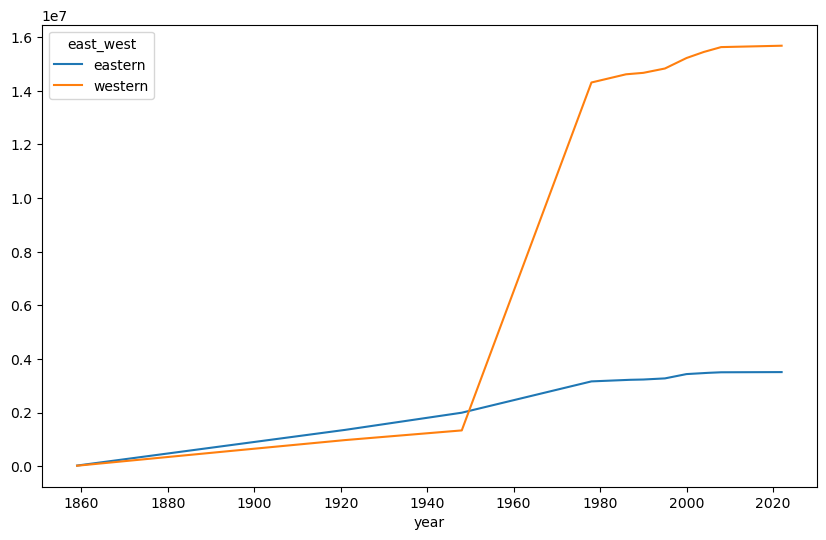

In [31]:
cumulative_buildings_east_west()

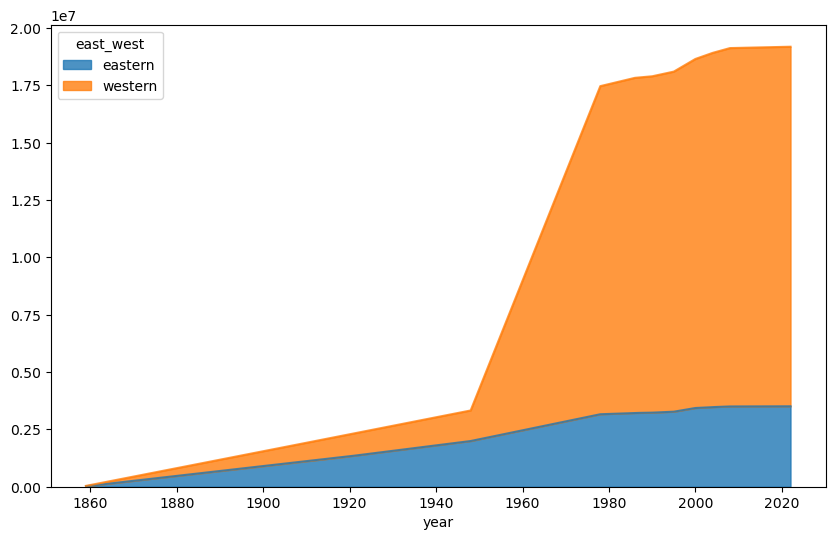

In [35]:
def stacked_cumulative_hist():
    yearly_counts = (
        buildings
        .groupby(["year", "east_west"])  # region = "East" or "West"
        .size()
        .reset_index(name="count")
    )

    pivot_df = yearly_counts.pivot(index="year", columns="east_west", values="count").fillna(0)
    pivot_cum = pivot_df.sort_index().cumsum()
    pivot_cum.plot(kind="area", stacked=True, figsize=(10,6), alpha=0.8)

stacked_cumulative_hist()